## Nedbørsoppgaven Del 5: For-løkker

*Nedbørsoppgavene Del 1 til 5 er laget som støtte-oppgaver til oppgaven "Nedbør i Norge". Oppgaven "Nedbør i Norge" er en lengre oppgave som kommer innom mange forskjellige programerings-elementer. Intensjonen er at hvis man først gjør deloppgavene 1 til 5 og så går gjennom det nokså omfattende eksempelet på starten av oppgaven "Nedbør i Norge" så vil det programeringstekniske i oppgaven "Nedbør i Norge" være repetisjon, slik at man kan fokusere på den naturvitenskaplige tolkningen av dataene. På denne måten får man både trening i programmering og erfaring med hvordan det kan brukes til å studere og forstå naturvitenskaplige prosesser.*

-------------

For-løkker er nyttige når man skal gjøre nesten det samme flere ganger på rad. Det gjør koden ryddig og oversiktlig, og det er greit å holde oversikten på hvilke beregninger som egentlig gjøres. I blant kan de samme operasjonene gjøres med både for-løkker og vektoroperasjoner. Når man jobber med veldig store datasett er det ofte lurt å bruke vektorregning fordi dette er raskere enn store for-løkker, men i starten, når man enda jobber med å bli vant med programmering, blir det iblant litt vanskeligere å holde oversikten med vektoroperasjonen. Datasettene vi jobber med her er såpass små at tidsbruken ikke så mye å si.

Det kan likevel bli forvirrende å holde kontroll på indekseringen til også forløkker i blant, særlig hvis det er flere "nivåer" med for-løkker ("nested" loops). 

I denne oppgaven bruker vi data av årlig gjennomsnittstemperatur i Bergen fra 1861 til 2021 for å vise et eksempel på hvordan en for-løkke kan brukes. Til slutt bruker vi et tilsvarende datasett inndelt i måneder for et eksempel på en dobbel for-løkke. 


In [1]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer
from EkteDataFunk import loadData # for filinnlasting
import matplotlib

In [2]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)
temp.shape, tid.shape

((160, 1), (160,))

Tenk deg at du vil gjøre en beregning (for ekesmpel ta gjennomsnittet) over hvert tiår med data. Da må du 1) dele datasettet inn i tiårs-bolker, og 2) ta gjennomsnittet over hver bolk.

#### 1. Del datasettet inn i tiårs-bolker

In [3]:
len(tid) # Datasettet spenner 160 år
T=len(tid) # T er nå lengden av tidsserien

In [4]:
start=0
stop=T
N=int(T/10)+1 # N må være en integer, altså et heltall. Det holder ikke at 
              # T/10 har null som desimal. Vi må legge til 1 for å få 
              # inndelingen rett: siden vi vil ha med endepunktet trenger vi 
              # en ekstra verdi.
    
ind=np.linspace(start,stop,N) # Husk: np.linspace(start,stop,number of values)
ind # Start- og slutt-indeks til hver av de 16 tiårs-bolkene (0 er start-indeks og 10 er slutt-indeks til den første bolken etc)


array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160.])

In [5]:
ind=ind.astype(int) # Husk fra Del 1 om indeksering: indekser MÅ være integers

Vi kunne fått det samme resultatet ved å bruke f.eks. np.arange istedet. Da må vi bruke stop + 1 istedet for stop for å bestemme at vi vil ha med endepunktet. Denne tidsserien kan deles perfekt inn i tiårsbolker. I andre tilfeller måtte man tatt stilling til hva man skulle gjort med resten, f.eks. hvis datasettet var 167 tidssteg langt. Skal man la de 7 siste årene gjelde som en tiårspreiode, eller skal man kutte disse årene ut fra analysen?  

In [6]:
np.arange(start,stop+1,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160])

In [7]:
tid[30:40]

array([1891., 1892., 1893., 1894., 1895., 1896., 1897., 1898., 1899.,
       1900.])

#### Oppgave 1:
Hva skjer dersom du ikke legger til 1 i beregningen av N? Prøv!

In [8]:
N=int(T/10) # N må være en integer, altså et heltall. Det holder ikke at 
              # T/10 har null som desimal. Vi må legge til 1 for å få 
              # inndelingen rett: siden vi vil ha med endepunktet trenger vi 
              # en ekstra verdi.
    
ind=np.linspace(start,stop,N) # Husk: np.linspace(start,stop,number of values)
ind # Start- og slutt-indeks til hver av de 16 tiårs-bolkene (0 er start-indeks og 10 er slutt-indeks til den første bolken etc)


array([  0.        ,  10.66666667,  21.33333333,  32.        ,
        42.66666667,  53.33333333,  64.        ,  74.66666667,
        85.33333333,  96.        , 106.66666667, 117.33333333,
       128.        , 138.66666667, 149.33333333, 160.        ])

#### 2. Kjør en for-løkke


For å finne gjennomsnittstemperaturen for hver av de 16 tiårsperiodene kan man bruke en for-løkke.

Vi går først gjennom fire små eksempler for å forklare tanken. 

In [9]:
print('ex1')
for i in [0,1,2,3]:
    print(i)    

ex1
0
1
2
3


In [10]:
print('ex2')
for i in range(4):
    print(i)    

ex2
0
1
2
3


In [11]:
print('ex3')
for i in range(4):
    print(temp[i])

ex3
[8.33636364]
[7.71666667]
[7.75833333]
[6.86666667]


In [12]:
print('ex4')    
for i in tid[30:40]:
    print(i)

ex4
1891.0
1892.0
1893.0
1894.0
1895.0
1896.0
1897.0
1898.0
1899.0
1900.0


#### Oppgave 1.
Lag tre for-løkker.
- en som printer ut de første fem temperaturene i "temp"

In [13]:
for i in temp[:5]:
    print(i)

[8.33636364]
[7.71666667]
[7.75833333]
[6.86666667]
[7.225]


- samme som over, men med en annerledes for-løkke

In [14]:
for i in range(5):
    print(temp[i])

[8.33636364]
[7.71666667]
[7.75833333]
[6.86666667]
[7.225]


- en som printer ut både år og temperatur mellom år 1876 og 1883

In [26]:
# Forslag 1

start=np.where(tid==1876)[0][0]
stop=np.where(tid==1883)[0][0]

for i in np.arange(start,stop+1):
    print(tid[i])
    print(temp[i])

1876.0
[6.78333333]
1877.0
[6.55]
1878.0
[7.06666667]
1879.0
[6.69166667]
1880.0
[7.53333333]
1881.0
[6.36666667]
1882.0
[7.9]
1883.0
[7.6]


In [20]:
# Forslag 2

start=np.where(tid==1876)[0][0]

for i in range(1883-1875):
    print(tid[start+i])
    print(temp[start+i])

1876.0
[6.78333333]
1877.0
[6.55]
1878.0
[7.06666667]
1879.0
[6.69166667]
1880.0
[7.53333333]
1881.0
[6.36666667]
1882.0
[7.9]
1883.0
[7.6]


#### 3. Bruk en for-løkke til å finne gjennomsnittstemperaturen for hver av de 16 tiårsperiodene

Cellen under betyr: "for hvert element `i` i `range(16)=[0,1,2,...,15]`, skriv ut gjennomsnittsverdien av temperatur i perioden med indeks `ind[i]` til `ind[i+1]`". For f.eks. `i=3` betyr dette: skriv ut gjennomsnittet av temperatur fra `ind[3]` til `ind[4]`. Dette er det samme som `30` til `40`, altså `temp[30:40]`, som er det samme som temperaturen fra  1891-1900. Denne utregningen gjøres for alle `i` mellom 0 og 15 (16 elementer i `range(16)`). Hver gang utregningen gjøres heter "en iterasjon". Siden utregningen her gjøres 16 ganger er det 16 iterasjoner i denne for-løkken. 

Vi må ta gjennomsnitt med nanmean fordi det er NaN-verdier i datasettet.


In [28]:
start=0
stop=T
N=int(T/10)+1 # N må være en integer, altså et heltall. Det holder ikke at 
              # T/10 har null som desimal. Vi må legge til 1 for å få 
              # inndelingen rett: siden vi vil ha med endepunktet trenger vi 
              # en ekstra verdi.
    
ind=np.linspace(start,stop,N) # Husk: np.linspace(start,stop,number of values)
ind # Start- og slutt-indeks til hver av de 16 tiårs-bolkene (0 er start-indeks og 10 er slutt-indeks til den første bolken etc)
ind=ind.astype(int) # Husk fra Del 1 om indeksering: indekser MÅ være integers


for i in range(16):
    print(np.nanmean(temp[ind[i]:ind[i+1]]))

7.286969696969697
7.2570454545454535
7.286666666666667
7.206666666666666
7.147499999999999
7.188333333333334
7.285000000000001
7.8708333333333345
7.811666666666667
7.7666666666666675
7.389166666666666
7.621666666666667
7.75
8.080833333333334
8.364166666666668
8.740833333333333


#### Oppgave 2.
Skriv ut gjennomsnittstemperaturen for hvert tiende år for de 9 første tiårsperiodene. Skriv også ut året hver disse 9 tiårsperiodene starter. 

In [32]:
for i in range(9):
    print('tid=',np.nanmean(tid[ind[i]:ind[i+1]]), '; temp=',np.nanmean(temp[ind[i]:ind[i+1]]))

tid= 1865.5 ; temp= 7.286969696969697
tid= 1875.5 ; temp= 7.2570454545454535
tid= 1885.5 ; temp= 7.286666666666667
tid= 1895.5 ; temp= 7.206666666666666
tid= 1905.5 ; temp= 7.147499999999999
tid= 1915.5 ; temp= 7.188333333333334
tid= 1925.5 ; temp= 7.285000000000001
tid= 1935.5 ; temp= 7.8708333333333345
tid= 1945.5 ; temp= 7.811666666666667


#### 4. Lagre verdiene fra en for-løkke
I cellene over skriver vi ut verdiene, men i blant trenger man å lagre verdiene for seinere bruk. Da må man skrive resultatet til en ny variabel etter hver iterasjon. For en effektiv kode er det lurt å lage en variabel på forhånd som du kan skrive resultatene inn i underveis. Dette funker dersom man vet dimensjonene til resultatet på forhånd, noe man ikke alltid gjør - da må man istedet la variablen bygge på dimensjonene sine underveis, og det er ofte tidkrevende. Vi trenger imidlertid ikke ta stilling til det her, fordi vi vet hvor stor resultat-matrisen vår skal være: (16, 1) for 16 tiårsperioder.

I cellen under lages en variabel som du etterpå skriver gjennomsnittsverdiene til inni for-løkken. Enn så lenge er de 16 plassene bare fylt med 0. Vektoren må ha plass til 16 elementer - ett for hver av de 16 tiårs-bolkene. Derfor må vektoren være ett element kortere enn `ind`.

In [33]:
meanTemp=np.zeros((len(ind)-1,1)) 
meanTemp.shape

(16, 1)

Vi ser på to metoder for å beregne gjennomsnittstemperatur for hver av de 9 første tiårs-bolkene ved hjelp av en for-løkke, og lagrer resultatet i `test`.

In [38]:
test=np.zeros((9,1)) 

**Metode 1:**
Indeksen til `test` er `int(i/10)=0,1,2,...,8` fordi i denne metoden er `i` selve elementene i `ind=0,10,20,...,80`.

In [39]:
for i in ind[:9]: # "i" i ind[:-8] er elementene i "ind" fra starten til 
                   # og IKKE med de åtte siste elementene i 
                   # "ind": i=0,10,20,...,80
    test[int(i/10)]=np.nanmean(temp[i:i+10]) 
    # temp[i:i+10] er temperaturen fra startåret og ti år frem i tid. Er f.eks. 
    # i=40 blir dette temp[40:50]=temp fra 1901 til 1910. 

In [40]:
test

array([[7.2869697 ],
       [7.25704545],
       [7.28666667],
       [7.20666667],
       [7.1475    ],
       [7.18833333],
       [7.285     ],
       [7.87083333],
       [7.81166667]])

**Metode 2:** Cellen under er en annen for-løkke som gir nøyaktig samme resultat. Denne metoden ligner mer på eksempelet i seksjon 3 der vi ikke skrev resultatene til en variabel.

In [41]:
for i in range(9): # range(9) = fra 0 til og IKKE med 9, i.e., 9 elementer. 
    test[i]=np.nanmean(temp[ind[i]:ind[i+1]]) 
    # for e.g., i=0 blir dette temp[ind[0]:ind[1]]=temp[0:10]

In [42]:
test

array([[7.2869697 ],
       [7.25704545],
       [7.28666667],
       [7.20666667],
       [7.1475    ],
       [7.18833333],
       [7.285     ],
       [7.87083333],
       [7.81166667]])

#### Oppgave 3.
Lag en for-løkke som lagrer gjennomsnittstemperaturen av ikke bare de 9 første, men alle de 16 tiårsperiodene til variablen `meanTemp`.

In [50]:
# Forslag 1
for i in ind[:16]: 
    meanTemp[int(i/10)]=np.nanmean(temp[i:i+10]) 
   
print('forslag1:',meanTemp)

# Forslag 2
meanTemp=np.zeros((len(ind)-1,1)) 

for i in range(16): # range(9) = fra 0 til og IKKE med 9, i.e., 9 elementer. 
    meanTemp[i]=np.nanmean(temp[ind[i]:ind[i+1]]) 
    # for e.g., i=0 blir dette temp[ind[0]:ind[1]]=temp[0:10]
    
print('forslag2:',meanTemp)


forslag1: [[7.2869697 ]
 [7.25704545]
 [7.28666667]
 [7.20666667]
 [7.1475    ]
 [7.18833333]
 [7.285     ]
 [7.87083333]
 [7.81166667]
 [7.76666667]
 [7.38916667]
 [7.62166667]
 [7.75      ]
 [8.08083333]
 [8.36416667]
 [8.74083333]]
forslag2: [[7.2869697 ]
 [7.25704545]
 [7.28666667]
 [7.20666667]
 [7.1475    ]
 [7.18833333]
 [7.285     ]
 [7.87083333]
 [7.81166667]
 [7.76666667]
 [7.38916667]
 [7.62166667]
 [7.75      ]
 [8.08083333]
 [8.36416667]
 [8.74083333]]


#### 5. Plot dataene

For å plotte dataene tenger vi en tidsvektor med midtpunktet av hver tiårs-bolk. Vi overskriver T fra tidligere fordi vi ikke trenger den mer.

Vi starter på `tid[4]` og slutter på `tid[-5]` fordi dette er midtpunktene til den første og den siste tiårsperioden. 

In [51]:
print(tid[4]), print(tid[-5])
T=np.arange(tid[4],tid[-5],10)
# For å dobbeltsjekke hvordan np.arange funker, sjekk dokumentasjonen. Her 
# finner du at inputene er (start,stop,step).
T

1865.0
2016.0


array([1865., 1875., 1885., 1895., 1905., 1915., 1925., 1935., 1945.,
       1955., 1965., 1975., 1985., 1995., 2005., 2015.])

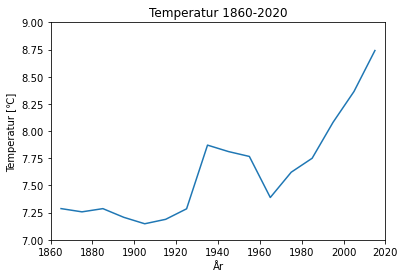

In [52]:
plt.plot(T,meanTemp)
plt.title('Temperatur 1860-2020')
plt.xlabel('År')
plt.ylabel('Temperatur [\u2103]') # \u2103 er koden for grader celcius. 
plt.xlim([1860,2020]) # sett grense for x-aksen
plt.ylim([7,9]) # sett grense for y-aksen
plt.show() 

For å kontrollere at dette gjennomsnittet gjenspeiler de faktiske dataene på en god måte kan det være lurt å plotte begge linjene i samme figur.

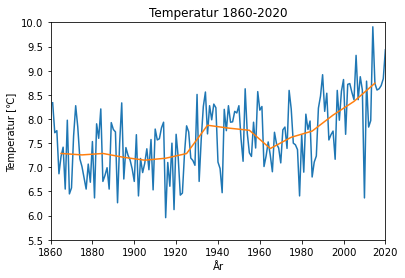

In [53]:
plt.plot(tid,temp) # legg til de originale dataene i bakgrunnen. 
plt.plot(T,meanTemp)
plt.title('Temperatur 1860-2020')
plt.xlabel('År')
plt.ylabel('Temperatur [\u2103]')
plt.xlim([1860,2020])
plt.ylim([5.5,10])
plt.show()

#### Oppgave 4:
Se tilbake på *Nedbørsoppgaven Del 3* der vi plottet hvert tiende datapunkt. Kommenter på forskjellene mellom denne figuren og figuren rett over.

#### Oppgave 5:
Beregn temperatur for tjueårs-bolker. Bruk den metoden som er mest intuitiv/logisk for deg. Om du gjør det på en annen måte enn i eksemplene over er det supert. For å sjekke at metoden din funker kan du gjøre det likt som over og se om du får samme resultat med begge fremgangsmåter. 

In [68]:
start=0
T=len(tid) # T er nå lengden av tidsserien
stop=T
N=int(T/20)+1 # N må være en integer, altså et heltall. Det holder ikke at 
              # T/10 har null som desimal. Vi må legge til 1 for å få 
              # inndelingen rett: siden vi vil ha med endepunktet trenger vi 
              # en ekstra verdi.
    
 

ind=np.linspace(start,stop,N) # Husk: np.linspace(start,stop,number of values)
ind # Start- og slutt-indeks til hver av de 16 tiårs-bolkene (0 er start-indeks og 10 er slutt-indeks til den første bolken etc)

ind=ind.astype(int) # Husk fra Del 1 om indeksering: indekser MÅ være integers

for i in range(len(ind)-1):
    print(np.nanmean(temp[ind[i]:ind[i+1]]))

7.272007575757575
7.246666666666667
7.167916666666668
7.577916666666665
7.789166666666667
7.505416666666667
7.915416666666665
8.5525


#### Oppgave 6:
Lag en figur der du viser de originale dataene, gjennomsnittet over tiårsbolkene, og gjennomsnittet over tjueårs-bolkene i samme figur. 

#### 6. Dobbel for-løkke

Vi vil nå gjøre det samme som over (gjennomsnitt over tiårs-bolker), men vi vil gjøre det for hver måned individuelt slik at vi står igjen med gjennomsnittlig temperatur for januar, februar, mars etc. i 1860-1870, og tilsvarende for alle tiårsperiodene fremover. Vi laster inn datasettet TempBergen.txt som har verdier for hver måned fra 1861 til 2021. 

Utenom inndelingen i måneder er dette datasettet likt det vi brukte over bortsettfra at 2021 er inkludert. Inspeksjon av datasettet (se f.eks. https://github.com/irendundas/EkteData/blob/main/TempBergen.txt) viser at nesten alle verdier i 2021 er NaN. Vi kutter derfor ut 2021 for å gjøre ting litt enklere, uten at vi egentlig ser vekk ifra noe særlig informasjon.

In [ ]:
file='TempBergen.txt'
temp,tid = loadData(file)
print(temp.shape)

For hver måned skal vi beregne gjennomsnittet over ti år: I cellen under midler vi over de ti første januar-månedene, så de neste ti januar-månedene, etc. Så midler vi over de ti første februar-månedene, så de neste ti februar-månedene, etc. 

Derfor har vi for-løkken som itererer gjennom 12 indekser ytterst, og for-løkken som itererer gjennom tiårsperiodene innerst. Det gjør at vi gjør oss ferdig med en og en måned av gangen. 

Man kan også gjøre dette motsatt: gjøre seg ferdig med en og en tiårsperiode av gangen. Å gjøre dette er siste del av oppgaven.

MeanTemp må få en ny dimensjon siden vi nå har med alle månedene. I sted var den 16 elementer lang - nå må den være 16 elementer lang *for hver måned*. Den må altså være 16 x 12 elementer stor totalt.

Men først ser vi på tre enklere eksempler:

**Eksempel: dobbel for-løkke**

In [ ]:
for i in range(3):
    for j in range(4):
        print('i=',i,'j=',j)

**Eksempel: lagre verdier fra en dobbel for-løkke**
Siden vi looper gjennom `range(3)` og `range(4)` må resultat-matrisen ha tre rader og fire kolonner. Når `i=0` og `j=0` plasseres resultatet i `test[0,0]`, altså øvre venstre hjørne av matrisen. Når f.eks. `i=2` og `j=3` plasseres resultatet i `test[2,3]`, altså nedre høyre hjørne. Husk **R**ace **C**ar (**R**ow **C**olumn).

In [ ]:
test=np.zeros((3,4))
for i in range(3):
    for j in range(4):
        test[i,j]=i*j
        
test

**Eksempel: rekkefølgen av løkkene**
Det er viktig å holde orden på rekkefølgen av løkkene. Lar vi f.eks. resultat-matrisen `test` ha dimensjoner (4, 3), vil ikke loopen fungere lengre. 

In [ ]:
test=np.zeros((4,3))
for i in range(3):
    for j in range(4):
        test[i,j]=i*j
        


#### 7. Beregn gjennomsnittet over ti år for hver måned: 

I loopen under blir `meanTemp[0,0]` nå gjennomsnittet over de ti første januarmånedene. `meanTemp [-1,-1]` blir gjennomsnittet over de ti siste desembermånedene.

In [ ]:
meanTemp=np.zeros((len(ind)-1,12)) # 17-1 x 12

In [ ]:
for mo in range(12): # iterer gjennom månedene
    for i in range(len(ind)-1): # iterer gjennom tiårsperiodene
        meanTemp[i,mo]=np.nanmean(temp[ind[i]:ind[i+1],mo]) 
    
meanTemp.shape



#### 8. Lag en figur over de månedlige tiårsperiodene

Vi kan nå lage en figur som viser innholdet i `meanTemp`.

In [ ]:
# Denne listen med "strings" (tekst) bruker vi i "label" for hver linje
string=[
    'Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Des'] 

Dersom vi ikke spesifiserer fargene til figuren plotter python i sine standard-farger. Disse er det ti av, så i vårt tilfelle, hvor vi vil plotte 12 linjer, vil linjene for januar og november, og februar og desember blir like. Derfor må vi lage en vektor med 12 ulike fargekoder på forhånd. 

Matplotlib har et bibilitek med fargekart, se f.eks. her: https://matplotlib.org/stable/gallery/color/colormap_reference.html. 
Vi bruker karted "Paired" fordi dette har tolv diskrete farger. Man kan såklart bygge sin egen farge-vektor med bedre farger, men for enkelhets skyld bruker vi dette nå. 

In [ ]:
n = 12 # 12 farger
colors = matplotlib.cm.Paired(np.linspace(0,1,n))

In [ ]:
for mo in range(12):
    plt.plot(T,meanTemp[:,mo], color=colors[mo], label=string[mo])

    
plt.title('Temperatur 1860-2020')
plt.xlabel('År')
plt.ylabel('Temperatur [\u2103]')
plt.xlim([1860,2020])

# Linjen under gjør at legend kommer utenfor figuren 
# og at teksten blir litt større. 
plt.legend(bbox_to_anchor=(1.02, 0, 0.2, 1), loc='lower left',  
           ncol=1, borderaxespad=0.,fontsize=11.4)             

plt.show()

Denne figuren viser nå temperatur for hver måned som et gjennomsnitt av hver tiårsperiode mellom 1860 og 2020. 

#### 6. Oppgave

Bruk informasjon fra figuren til å diskutere spørsmålene under. Gjør også beregninger med datasettet om det hjelper deg i å gi et godt begrunnet svar. 
- Hvordan har utviktlingen i temperatur i Bergen vært siden 1860? Er det forskjell på første og andre 80-års periode?
- Er det noen varme eller kalde perioder som skiller seg ut? 
- Hvilken måned har strørst endring?

Sammenlign dette med figurene over.
- Hvilket inntrykk gir det totale gjennomsnittet (figurene i seksjon 3) av endring i temperatur over tid i forhold til hvordan endringen når perioden er inndelt i måneder?
- I figurene i seksjon 3 var det en tydelig endring rundt 1940, og en sterk økning fra 1960. Hvor er disse elementene blitt av i figuren over?
- Beregn gjennomsnittet over alle månedene og lag en ny figur der år 1860-2020 er langs x-aksen og gjennomsnittet av temperatur langs y-aksen). Svar på forrige spørsmål på nytt.

#### 7. Oppgave

Gjør tilsvarende som i seksjon 7, men lag den doble for-løkken motsatt slik at man beregner gjennomsnittet av hver måned for en og en tiårsperiode av gangen. 